# データ読み込み

- ファイルの確認
- ライブラリの読み込み
- データの読み込み
- 構造の把握
- 長さの把握
- 欠損の確認

In [1]:
!ls

beginner.ipynb	sub1.csv  sub3.csv  submit.csv	       test.csv
lightgbm.ipynb	sub2.csv  sub4.csv  submit_sample.csv  train.csv


In [2]:
# データ操作系
import pandas as pd
import numpy as np
import collections
# グラフ描画系
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# 前処理
from sklearn.preprocessing import LabelEncoder
# データ分割
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
# 機械学習モデル
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.ensemble import RandomForestClassifier # ランダムフォレスト
from sklearn.svm import LinearSVC # SVM
import lightgbm as lgb #LightGBM
# 制御系
import warnings
warnings.simplefilter('ignore')
import gc

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("submit_sample.csv")

In [4]:
test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0,35,technician,single,secondary,no,89043,no,no,cellular,7,feb,101,2,184,2,success
1,1,37,services,married,secondary,no,64372,yes,no,cellular,7,jul,158,3,241,0,unknown
2,2,31,services,single,secondary,no,31606,yes,no,unknown,15,may,152,2,47,0,unknown
3,3,31,admin.,married,secondary,no,94826,yes,no,cellular,27,may,345,2,490,0,unknown
4,4,32,services,married,secondary,no,100401,no,no,cellular,7,jan,126,1,686,0,other


In [5]:
sample.head()

,0,0.1
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [6]:
print(len(train))
print(len(test))
print(len(sample))

27100
18050
18049


In [7]:
train.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
test.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

# データの結合

- 同時に処理するため一時的にtrainとtestを結合する
- 長さの検算
- 欠損の検算

In [9]:
data = pd.concat([train, test], sort=False)

In [10]:
print(len(train), len(test), len(data))

27100 18050 45150


In [11]:
data.isnull().sum()

id               0
age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
y            18050
dtype: int64

# 特徴量エンジニアリング

In [12]:
train.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000
mean,13549.500000,36.073284,47682.901771,16.747565,229.325387,1.775830,432.482399,0.085720,0.077934
std,7823.240484,7.816417,31650.760036,8.569588,204.939958,0.950045,252.150648,0.365889,0.268072
min,0.000000,22.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6774.750000,31.000000,20015.750000,8.000000,121.000000,1.000000,214.000000,0.000000,0.000000
50%,13549.500000,33.000000,47624.000000,17.000000,158.000000,1.000000,432.000000,0.000000,0.000000
75%,20324.250000,37.000000,75330.000000,26.000000,345.000000,2.000000,650.000000,0.000000,0.000000
max,27099.000000,90.000000,102121.000000,31.000000,3076.000000,5.000000,870.000000,3.000000,1.000000


In [13]:
train.describe(include= 'O' )

,job,marital,education,default,housing,loan,contact,month,poutcome
count,27100,27100,27100,27100,27100,27100,27100,27100,27100
unique,11,3,4,2,2,2,3,11,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,5957,17565,15955,27090,15819,23651,19147,11232,23099


## age

In [14]:
data['isRetire'] = 0
data.loc[data['age'] == 60, 'isRetire'] = 1

In [15]:
data["isRetire"].value_counts()

0    44267
1      883
Name: isRetire, dtype: int64

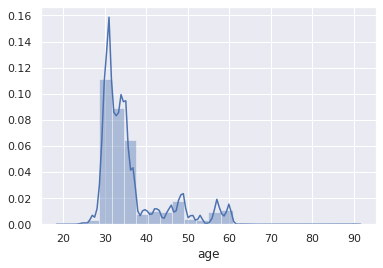

In [16]:
sns.distplot(data['age'], bins=24, color='b')

## balance

In [17]:
data['balance'].describe()

count     45150.000000
mean      47473.237940
std       31579.127347
min       -6847.000000
25%       19890.500000
50%       47360.500000
75%       74916.500000
max      102124.000000
Name: balance, dtype: float64

## day

## duration

## campaign

## pdays

## previous

## job

In [18]:
data["job"].head()

0        services
1    entrepreneur
2      management
3      technician
4      unemployed
Name: job, dtype: object

In [19]:
label_encoder = LabelEncoder()
label_encoder.fit(data["job"])
data["jobnum"]= label_encoder.transform(data["job"])
data["jobnum"].head()

0     7
1     2
2     4
3     9
4    10
Name: jobnum, dtype: int64

In [20]:
data[["job","jobnum"]][~data.duplicated(subset="jobnum")].sort_values('jobnum')

,job,jobnum
7,admin.,0
5,blue-collar,1
1,entrepreneur,2
47,housemaid,3
2,management,4
10,retired,5
42,self-employed,6
0,services,7
83,student,8
3,technician,9


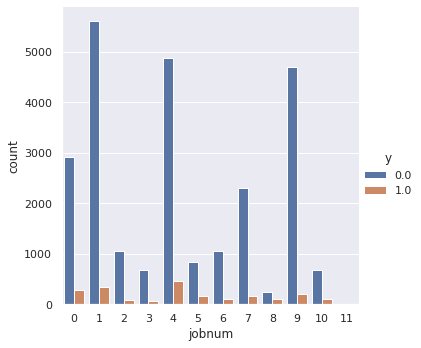

In [21]:
sns.factorplot(x='jobnum', data=data, hue='y', kind='count')

In [22]:
data['isTopLayer'] = 0
data.loc[(data['jobnum'] == 0) | (data['jobnum'] == 1)| (data['jobnum'] == 4) , 'isTopLayer'] = 1

## material

In [23]:
data['marital'].value_counts()

married     29218
single      11855
divorced     4077
Name: marital, dtype: int64

In [24]:
label_encoder = LabelEncoder()
label_encoder.fit(data["marital"])
data["maritalnum"]= label_encoder.transform(data["marital"])
data["maritalnum"].head()

0    1
1    2
2    1
3    1
4    1
Name: maritalnum, dtype: int64

In [25]:
data['marital'].value_counts()

married     29218
single      11855
divorced     4077
Name: marital, dtype: int64

## education

In [26]:
data['education'].value_counts()

secondary    26754
tertiary     11065
primary       5560
unknown       1771
Name: education, dtype: int64

In [27]:
data['education'].describe()

count         45150
unique            4
top       secondary
freq          26754
Name: education, dtype: object

In [28]:
label_encoder = LabelEncoder()
label_encoder.fit(data["education"])
data["educationnum"]= label_encoder.transform(data["education"])
data["educationnum"].head()

0    1
1    2
2    2
3    1
4    0
Name: educationnum, dtype: int64

## default

In [29]:
data['default'].value_counts()

no     45136
yes       14
Name: default, dtype: int64

In [30]:
data['default'].replace(['yes','no'], [1,0], inplace=True)

## housing

In [31]:
data['housing'].value_counts()

yes    26237
no     18913
Name: housing, dtype: int64

In [32]:
data['housing'].replace(['yes','no'], [0,1], inplace=True)

## loan

In [33]:
data['loan'].replace(['yes','no'], [1,0], inplace=True)

## contact

In [34]:
data['contact'].value_counts()

cellular     31754
unknown      11520
telephone     1876
Name: contact, dtype: int64

In [35]:
abel_encoder = LabelEncoder()
label_encoder.fit(data["contact"])
data["contactnum"]= label_encoder.transform(data["contact"])
data["contactnum"].head()

0    0
1    0
2    0
3    2
4    1
Name: contactnum, dtype: int64

## month

In [36]:
data['month'].value_counts()

may    18818
aug     5661
jul     5429
jun     5196
nov     3806
apr     3303
feb     1785
jan      609
mar      330
oct      167
sep       46
Name: month, dtype: int64

In [37]:
data['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], [1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)

## poutcome

In [38]:
train["poutcome"].value_counts()

unknown    23099
failure     2717
other        826
success      458
Name: poutcome, dtype: int64

In [39]:
abel_encoder = LabelEncoder()
label_encoder.fit(data["poutcome"])
data["poutcomenum"]= label_encoder.transform(data["poutcome"])
data["poutcomenum"].head()

0    1
1    3
2    0
3    0
4    3
Name: poutcomenum, dtype: int64

## 整形完了後

In [40]:
data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,...,previous,poutcome,y,isRetire,jobnum,isTopLayer,maritalnum,educationnum,contactnum,poutcomenum
0,0,31,services,married,secondary,0,12294,0,0,cellular,...,0,other,0.0,0,7,0,1,1,0,1
1,1,29,entrepreneur,single,tertiary,0,43027,1,0,cellular,...,0,unknown,1.0,0,2,0,2,2,0,3
2,2,35,management,married,tertiary,0,12252,0,0,cellular,...,0,failure,0.0,0,4,1,1,2,0,0
3,3,31,technician,married,secondary,0,99121,0,1,unknown,...,0,failure,0.0,0,9,0,1,1,2,0
4,4,48,unemployed,married,primary,0,42005,0,0,telephone,...,0,unknown,0.0,0,10,0,1,0,1,3


# 相関の確認

In [41]:
data.corr()

,id,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,isRetire,jobnum,isTopLayer,maritalnum,educationnum,contactnum,poutcomenum
id,1.000000,0.006042,0.008952,0.001891,-0.003951,0.010476,-0.001089,0.004609,-0.004184,-0.002797,0.000338,-0.004696,0.002318,0.004806,0.006986,-0.009354,-0.008836,-0.004599,-0.011158,-0.007088
age,0.006042,1.000000,-0.003564,0.000678,0.285335,-0.044623,-0.064515,0.104991,-0.057669,0.033344,0.004698,0.037856,0.086668,0.431069,0.048086,-0.119842,-0.209372,-0.053898,-0.054893,-0.002386
default,0.008952,-0.003564,1.000000,0.001155,0.002895,0.004562,-0.009330,0.008856,-0.004591,-0.010390,0.003120,-0.004179,-0.005586,-0.002487,0.001599,0.001209,-0.007550,-0.005068,-0.003940,0.005681
balance,0.001891,0.000678,0.001155,1.000000,-0.005037,-0.008646,0.001772,-0.006051,0.000807,-0.004737,-0.001370,0.005881,-0.000899,-0.000405,0.006206,-0.008214,-0.001651,0.001845,0.000181,-0.009723
housing,-0.003951,0.285335,0.002895,-0.005037,1.000000,-0.009817,-0.131649,0.234345,-0.183220,0.103906,-0.003761,0.040770,0.164710,0.099889,0.066930,-0.140472,0.036154,0.082079,-0.118939,0.047447
loan,0.010476,-0.044623,0.004562,-0.008646,-0.009817,1.000000,-0.094751,0.061149,-0.068805,0.103973,-0.005237,-0.051736,-0.062696,-0.041606,0.012703,-0.049986,-0.014937,-0.055173,0.039239,0.065985
day,-0.001089,-0.064515,-0.009330,0.001772,-0.131649,-0.094751,1.000000,-0.082484,0.132603,-0.060987,-0.002337,-0.053511,-0.011804,-0.011998,0.018764,0.034868,-0.006567,0.000948,-0.094050,0.110050
month,0.004609,0.104991,0.008856,-0.006051,0.234345,0.061149,-0.082484,1.000000,-0.140673,0.107127,0.001102,-0.031353,-0.049524,-0.009213,0.024529,-0.046676,-0.044363,0.052085,-0.181944,0.054773
duration,-0.004184,-0.057669,-0.004591,0.000807,-0.183220,-0.068805,0.132603,-0.140673,1.000000,-0.088835,0.001334,-0.022931,-0.030313,0.006842,-0.009833,0.050116,-0.026807,-0.023502,0.034556,0.041852
campaign,-0.002797,0.033344,-0.010390,-0.004737,0.103906,0.103973,-0.060987,0.107127,-0.088835,1.000000,-0.002440,-0.041406,-0.030653,-0.034932,-0.008934,-0.010123,-0.037668,-0.011010,-0.051145,0.057364


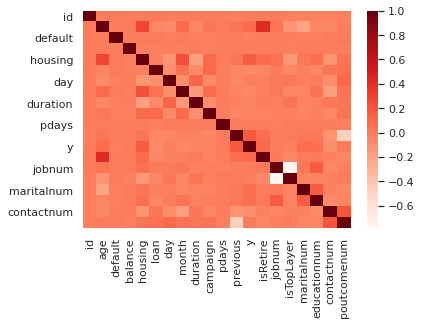

In [42]:
sns.heatmap(data.corr(),cmap="Reds")

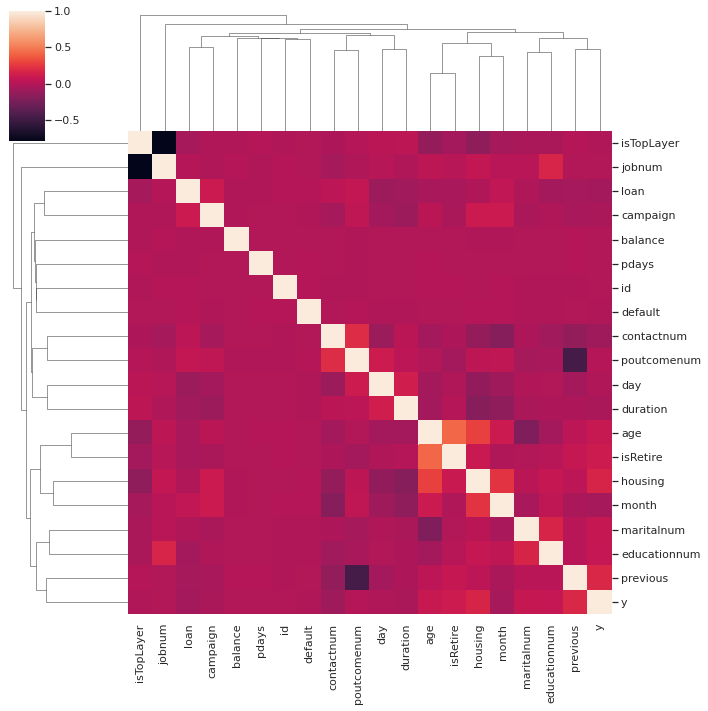

In [43]:
sns.clustermap(data.corr())

# 採用するカラムの決定

In [49]:
data.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'isRetire', 'jobnum',
       'isTopLayer', 'maritalnum', 'educationnum', 'contactnum',
       'poutcomenum'],
      dtype='object')

In [58]:
data["pdays"]

0        498
1        702
2        826
3        120
4        273
        ... 
18045    417
18046    815
18047    370
18048     41
18049    699
Name: pdays, Length: 45150, dtype: int64

In [73]:
adopt_columns = ['age', 'default', 'balance',
       'housing', 'loan', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'y', 'jobnum',
       'maritalnum', 'educationnum', 'contactnum',
       'poutcomenum']
categorical_features = ['default',
       'housing', 'loan', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous','jobnum',
       'maritalnum', 'educationnum', 'contactnum',
       'poutcomenum']
adopt_data = data[adopt_columns]
adopt_data.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,jobnum,maritalnum,educationnum,contactnum,poutcomenum
0,31,0,12294,0,0,21,11,101,3,498,0,0.0,7,1,1,0,1
1,29,0,43027,1,0,22,8,158,2,702,0,1.0,2,2,2,0,3
2,35,0,12252,0,0,11,11,351,1,826,0,0.0,4,1,2,0,0
3,31,0,99121,0,1,16,5,658,2,120,0,0.0,9,1,1,2,0
4,48,0,42005,0,0,3,4,177,1,273,0,0.0,10,1,0,1,3


In [74]:
# 標準化？
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(adopt_data)

X_train = scale.transform(adopt_data)

## データをtrainとtestに戻す

In [75]:
train = adopt_data[:len(train)]
test = adopt_data[len(train):]

## データを分割する

In [76]:
y_train = train['y']
X_train = train.drop('y', axis=1)
X_test = test.drop('y', axis=1)

### ロジスティック回帰

In [68]:
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)
clf = LogisticRegression(penalty='l2', solver="sag", random_state=0)
scoring = {
    'accuracy': 'accuracy',
    "recall": "recall_macro",
    "f":"f1_macro"
}
scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=cv)

In [69]:
scores

{'fit_time': array([0.67692113, 1.09016824, 0.75283766, 0.68715906]),
 'score_time': array([0.01473141, 0.01458788, 0.01357174, 0.01158643]),
 'test_accuracy': array([0.92206642, 0.92206642, 0.92206642, 0.92206642]),
 'test_recall': array([0.5, 0.5, 0.5, 0.5]),
 'test_f': array([0.47972662, 0.47972662, 0.47972662, 0.47972662])}

In [70]:
print("精度(accuracy)")
print(scores["test_accuracy"].mean())
print("検出率(recall)")
print(scores["test_recall"].mean())
print("F値(f)")
print(scores["test_f"].mean())

精度(accuracy)
0.9220664206642066
検出率(recall)
0.5
F値(f)
0.479726616495162


In [ ]:
clf.fit(X_train, y_train)
logistic_pred = clf.predict(X_test)

In [ ]:
logistic_pred = list(map(int, logistic_pred))
collections.Counter(logistic_pred)

In [ ]:
clf.coef_

### SVM

In [ ]:
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)
clf = LinearSVC()
scoring = {
    'accuracy': 'accuracy',
    "recall": "recall_macro",
    "f":"f1_macro"
}
scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=cv)

In [ ]:
scores

In [ ]:
print("精度(accuracy)")
print(scores["test_accuracy"].mean())
print("検出率(recall)")
print(scores["test_recall"].mean())
print("F値(f)")
print(scores["test_f"].mean())

In [ ]:
clf.fit(X_train, y_train)
svm_pred = clf.predict(X_test)

In [ ]:
svm_pred = list(map(int, svm_pred))
collections.Counter(svm_pred)

In [ ]:
clf.coef_

### LightGBT

In [86]:
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)
scoring = {
    'accuracy': 'accuracy',
    "recall": "recall_macro",
    "f":"f1_macro"
}
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0, stratify=y_train)
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train, categorical_feature=categorical_features)

params = {
    'objective': 'binary'
}

clf = lgb.LGBMClassifier(
    **params
)

clf.fit(X_train,y_train)
scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=cv)

In [87]:
scores

{'fit_time': array([0.15525675, 0.21884918, 0.25358248, 0.50265765]),
 'score_time': array([0.01660562, 0.0303905 , 0.01738238, 0.16361928]),
 'test_accuracy': array([0.92943201, 0.93158348, 0.92211704, 0.9281102 ]),
 'test_recall': array([0.59501448, 0.60882663, 0.56069872, 0.60695715]),
 'test_f': array([0.6339567 , 0.652085  , 0.58432375, 0.64566841])}

In [88]:
print("精度(accuracy)")
print(scores["test_accuracy"].mean())
print("検出率(recall)")
print(scores["test_recall"].mean())
print("F値(f)")
print(scores["test_f"].mean())

精度(accuracy)
0.9278106831112656
検出率(recall)
0.592874242518812
F値(f)
0.629008464242811


In [89]:
light_pred = clf.predict(X_test)

In [90]:
svm_pred = list(map(int, light_pred))
collections.Counter(light_pred)

Counter({1.0: 397, 0.0: 17653})

In [91]:
clf.coef_

AttributeError: 'LGBMClassifier' object has no attribute 'coef_'

# 提出準備

In [ ]:
#sub = pd.read_csv("submit.csv", header=None)

In [ ]:
#sub.shape

In [ ]:
#light_pred = sub[1]

In [ ]:
#light_pred.shape

In [ ]:
#len(svm_pred)

In [92]:
test["y"] = light_pred

In [93]:
test["y"].value_counts()

0.0    17653
1.0      397
Name: y, dtype: int64

In [94]:
test["y"].to_csv("sub5.csv", index=True, header=False)

In [95]:
!ls

beginner.ipynb	sub1.csv  sub3.csv  sub5.csv	submit_sample.csv  train.csv
lightgbm.ipynb	sub2.csv  sub4.csv  submit.csv	test.csv


In [96]:
!cat sub5.csv

0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0
10,0.0
11,0.0
12,0.0
13,0.0
14,0.0
15,0.0
16,0.0
17,0.0
18,0.0
19,0.0
20,0.0
21,0.0
22,0.0
23,0.0
24,0.0
25,1.0
26,0.0
27,0.0
28,0.0
29,0.0
30,0.0
31,0.0
32,0.0
33,0.0
34,0.0
35,0.0
36,0.0
37,0.0
38,0.0
39,0.0
40,0.0
41,0.0
42,0.0
43,0.0
44,0.0
45,0.0
46,0.0
47,0.0
48,0.0
49,0.0
50,0.0
51,0.0
52,0.0
53,0.0
54,0.0
55,0.0
56,0.0
57,0.0
58,0.0
59,0.0
60,0.0
61,0.0
62,0.0
63,0.0
64,0.0
65,0.0
66,0.0
67,0.0
68,0.0
69,0.0
70,0.0
71,0.0
72,0.0
73,0.0
74,0.0
75,0.0
76,0.0
77,0.0
78,0.0
79,0.0
80,0.0
81,0.0
82,0.0
83,0.0
84,0.0
85,0.0
86,0.0
87,1.0
88,1.0
89,0.0
90,0.0
91,0.0
92,0.0
93,0.0
94,0.0
95,0.0
96,0.0
97,0.0
98,0.0
99,0.0
100,0.0
101,0.0
102,0.0
103,0.0
104,0.0
105,1.0
106,0.0
107,0.0
108,0.0
109,0.0
110,0.0
111,0.0
112,0.0
113,0.0
114,0.0
115,0.0
116,0.0
117,0.0
118,0.0
119,0.0
120,0.0
121,0.0
122,0.0
123,0.0
124,0.0
125,0.0
126,0.0
127,0.0
128,0.0
129,0.0
130,0.0
131,0.0
132,0.0
133,0.0
134,0.0
135,0.0
136,0.0
137,0.0
138,0.

8896,0.0
8897,0.0
8898,0.0
8899,0.0
8900,0.0
8901,0.0
8902,0.0
8903,0.0
8904,0.0
8905,0.0
8906,0.0
8907,0.0
8908,0.0
8909,0.0
8910,0.0
8911,0.0
8912,0.0
8913,0.0
8914,0.0
8915,0.0
8916,0.0
8917,0.0
8918,0.0
8919,0.0
8920,0.0
8921,0.0
8922,0.0
8923,0.0
8924,0.0
8925,0.0
8926,0.0
8927,0.0
8928,0.0
8929,0.0
8930,0.0
8931,0.0
8932,0.0
8933,0.0
8934,0.0
8935,0.0
8936,0.0
8937,0.0
8938,1.0
8939,0.0
8940,0.0
8941,0.0
8942,0.0
8943,0.0
8944,0.0
8945,0.0
8946,0.0
8947,0.0
8948,0.0
8949,0.0
8950,0.0
8951,0.0
8952,0.0
8953,0.0
8954,0.0
8955,0.0
8956,0.0
8957,0.0
8958,0.0
8959,0.0
8960,0.0
8961,0.0
8962,0.0
8963,0.0
8964,0.0
8965,0.0
8966,0.0
8967,0.0
8968,0.0
8969,0.0
8970,0.0
8971,0.0
8972,0.0
8973,0.0
8974,0.0
8975,0.0
8976,0.0
8977,0.0
8978,0.0
8979,0.0
8980,0.0
8981,0.0
8982,0.0
8983,0.0
8984,0.0
8985,0.0
8986,0.0
8987,0.0
8988,0.0
8989,0.0
8990,0.0
8991,0.0
8992,0.0
8993,0.0
8994,0.0
8995,0.0
8996,0.0
8997,0.0
8998,0.0
8999,0.0
9000,0.0
9001,0.0
9002,0.0
9003,0.0
9004,0.0
9005,0.0
9006,0.0
9

14840,0.0
14841,0.0
14842,0.0
14843,0.0
14844,0.0
14845,0.0
14846,0.0
14847,0.0
14848,0.0
14849,0.0
14850,0.0
14851,0.0
14852,0.0
14853,0.0
14854,0.0
14855,0.0
14856,0.0
14857,0.0
14858,0.0
14859,0.0
14860,0.0
14861,0.0
14862,0.0
14863,0.0
14864,0.0
14865,0.0
14866,0.0
14867,0.0
14868,0.0
14869,0.0
14870,0.0
14871,0.0
14872,0.0
14873,0.0
14874,0.0
14875,0.0
14876,0.0
14877,0.0
14878,0.0
14879,0.0
14880,0.0
14881,0.0
14882,0.0
14883,0.0
14884,0.0
14885,0.0
14886,0.0
14887,0.0
14888,0.0
14889,0.0
14890,0.0
14891,0.0
14892,0.0
14893,0.0
14894,0.0
14895,0.0
14896,0.0
14897,0.0
14898,0.0
14899,0.0
14900,0.0
14901,0.0
14902,0.0
14903,0.0
14904,0.0
14905,0.0
14906,0.0
14907,0.0
14908,0.0
14909,0.0
14910,0.0
14911,0.0
14912,0.0
14913,0.0
14914,0.0
14915,0.0
14916,0.0
14917,0.0
14918,0.0
14919,0.0
14920,0.0
14921,0.0
14922,0.0
14923,0.0
14924,0.0
14925,0.0
14926,0.0
14927,0.0
14928,0.0
14929,0.0
14930,0.0
14931,0.0
14932,0.0
14933,0.0
14934,0.0
14935,0.0
14936,0.0
14937,0.0
14938,0.0
14939,0.0
